In [56]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap


# Import data

final_df = pd.read_csv('/home/joao_sena_ribeiros/Documents/my_python_folder/Projects/NeuroMatch_CompNeuro_2025/Group Project/Waffle/preprocessed_data/final_df.csv')



# Describtive stats

In [9]:
descriptive_stats = final_df.groupby('paired')[['duration', 'mean_speed', 'mean_acc', 'mean_rotation', 'mean_rotation_speed']].describe()

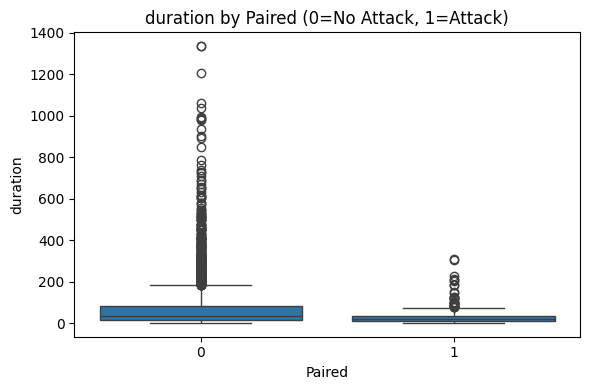

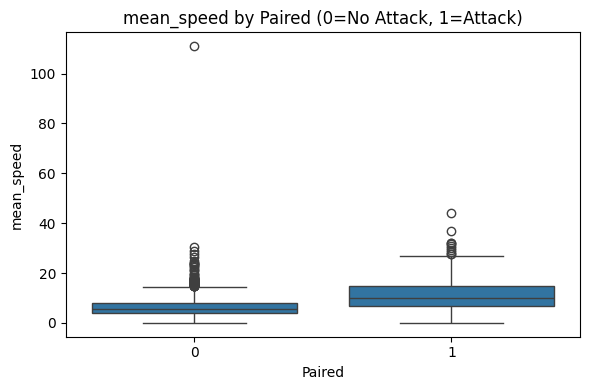

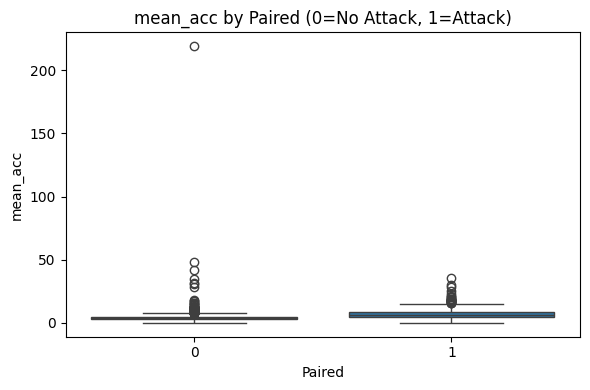

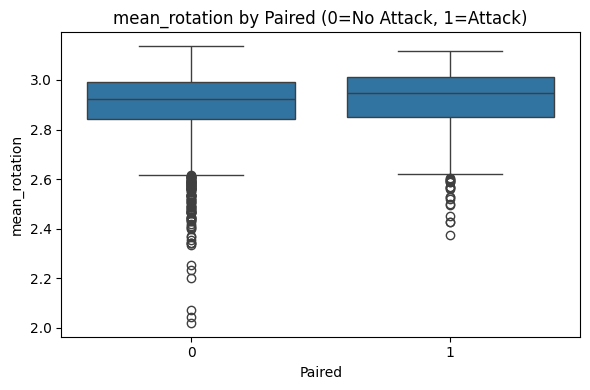

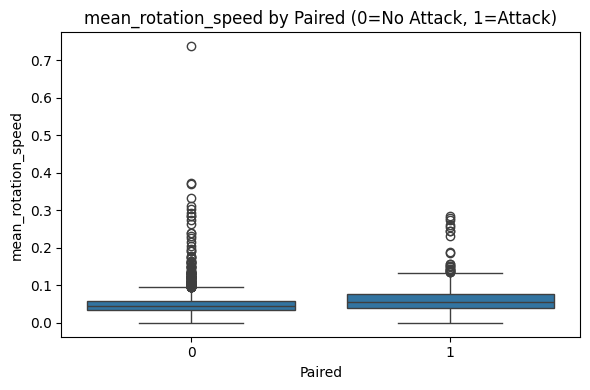

In [10]:
# Visual Comparison (Boxplots)

features = ['duration', 'mean_speed', 'mean_acc', 'mean_rotation', 'mean_rotation_speed']

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=final_df, x='paired', y=feature)
    plt.title(f'{feature} by Paired (0=No Attack, 1=Attack)')
    plt.xlabel('Paired')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

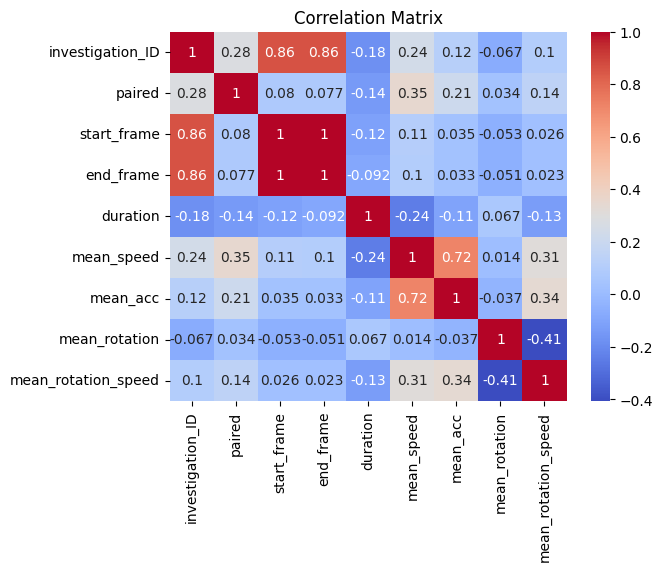

In [11]:
# Correlation matrix

corr = final_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# t-test

group0 = final_df[final_df['paired'] == 0]
group1 = final_df[final_df['paired'] == 1]

for feature in features:
    stat, p = ttest_ind(group0[feature], group1[feature], equal_var=False)
    print(f"{feature}: t={stat:.2f}, p={p:.4f}")

duration: t=15.10, p=0.0000
mean_speed: t=-14.62, p=0.0000
mean_acc: t=-12.32, p=0.0000
mean_rotation: t=-1.79, p=0.0745
mean_rotation_speed: t=-6.50, p=0.0000


# Predictive model

In [ ]:
# My try at predictive modeling

X = final_df[features]
y = final_df['paired']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94       503
           1       0.71      0.14      0.23        73

    accuracy                           0.88       576
   macro avg       0.80      0.56      0.58       576
weighted avg       0.87      0.88      0.85       576



# Dimensionality Reduction

In [60]:
# Choosing the features

features = [
    'duration', 'mean_speed', 'mean_acc',
    'mean_rotation', 'mean_rotation_speed'
]

X = final_df[features]

# Standardize scales

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#choose colors

my_cmap = ListedColormap([[1,0,0], [0,0,1]])


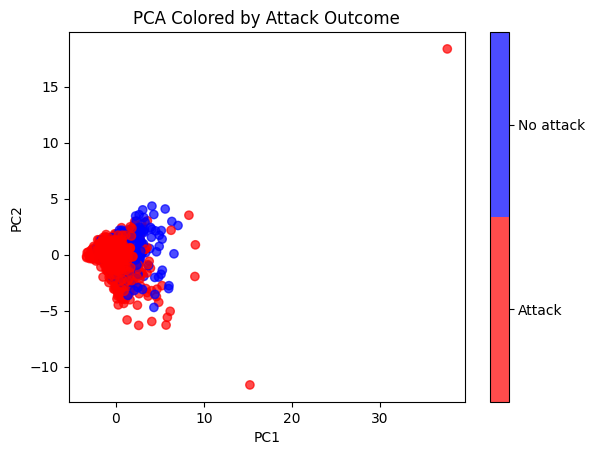

In [61]:
# PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the components

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_df['paired'], cmap=my_cmap, alpha=0.7)
plt.colorbar(ticks=[0.25,.75]).set_ticklabels(['Attack','No attack'])
plt.title('PCA Colored by Attack Outcome')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



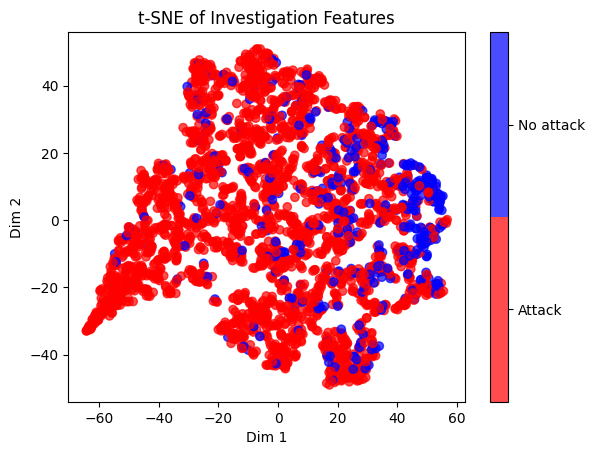

In [62]:
# t-SNE 

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=final_df['paired'], cmap=my_cmap, alpha=0.7)
plt.colorbar(ticks=[0.25,.75]).set_ticklabels(['Attack','No attack'])
plt.title('t-SNE of Investigation Features')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()
